## DataFrame Bookings

### 1. Cargar los Datos

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el archivo CSV
file_path = './data_rdv/Bookings.csv'
df_bookings = pd.read_csv(file_path, sep=',')

# Ver las primeras filas del DataFrame
print(df_bookings.head())

   PropertyId  Property_BookingId   BookingCreatedDate          ArrivalDate  \
0       43469              155168  2024-10-03 16:42:13  2024-10-09 00:00:00   
1       43025              155167           03/10/2024  2025-02-02 00:00:00   
2       43404              155166           03/10/2024  2024-11-18 00:00:00   
3       43276              155165  2024-10-03 15:55:39  2024-11-14 00:00:00   
4        4138              155164  2024-10-03 15:53:02  2024-11-20 00:00:00   

         DepartureDate  Adults  Children  Infants  Persons  NumNights  \
0  2024-10-12 00:00:00       2         0        0        2          3   
1  2025-02-07 00:00:00       3         0        0        3          5   
2  2024-11-25 00:00:00       3         0        0        3          7   
3  2024-11-18 00:00:00       5         0        0        5          4   
4  2024-12-06 00:00:00       5         0        0        5         16   

       Channel  RoomRate  CleaningFee  Revenue     ADR  TouristTax  TotalPaid  
0     

### 2. Descripción General del DataFrame

In [2]:
# Información básica del DataFrame
print(df_bookings.info())

# Descripción estadística de los datos numéricos
print(df_bookings.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79595 entries, 0 to 79594
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PropertyId          79595 non-null  int64  
 1   Property_BookingId  79595 non-null  int64  
 2   BookingCreatedDate  79595 non-null  object 
 3   ArrivalDate         79595 non-null  object 
 4   DepartureDate       79595 non-null  object 
 5   Adults              79595 non-null  int64  
 6   Children            79595 non-null  int64  
 7   Infants             79595 non-null  int64  
 8   Persons             79595 non-null  int64  
 9   NumNights           79595 non-null  int64  
 10  Channel             79162 non-null  object 
 11  RoomRate            71635 non-null  float64
 12  CleaningFee         79595 non-null  float64
 13  Revenue             71635 non-null  float64
 14  ADR                 79121 non-null  float64
 15  TouristTax          79420 non-null  float64
 16  Tota

### 3. Comprobación de Valores Faltantes

In [3]:
# Comprobar valores faltantes
missing_values = df_bookings.isnull().sum()
print(missing_values[missing_values > 0])


Channel        433
RoomRate      7960
Revenue       7960
ADR            474
TouristTax     175
dtype: int64


### 4. Análisis de Datos Categóricos

Channel
Airbnb                      48622
Booking.com                 23731
Stay U-nique.com Website     1997
Vrbo                         1244
Manual                        975
Name: count, dtype: int64


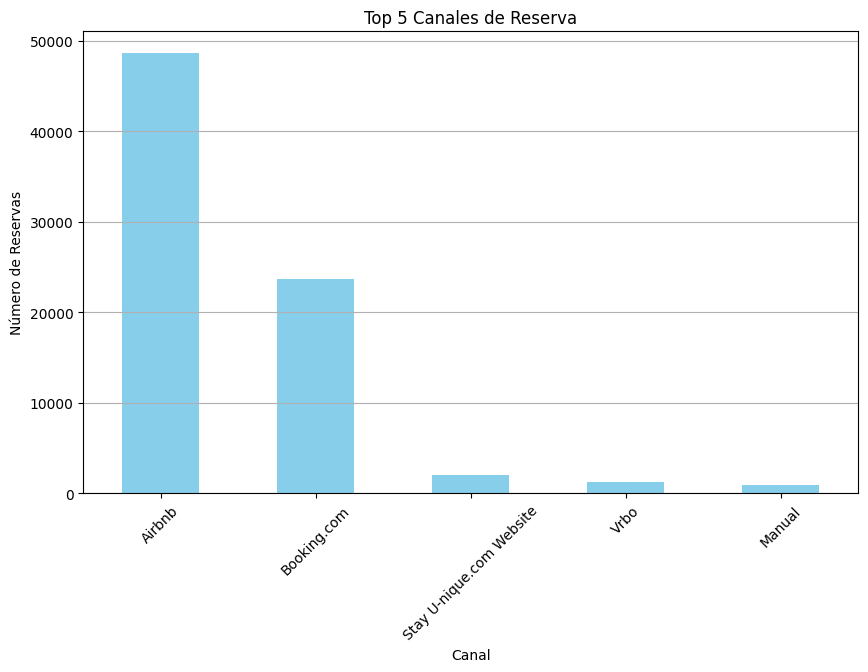

In [4]:
# Frecuencia de valores en la columna 'Channel'
channel_counts = df_bookings['Channel'].value_counts().head(5)
print(channel_counts)

# Graficar los resultados
plt.figure(figsize=(10, 6))
channel_counts.plot(kind='bar', color='skyblue')
plt.title('Top 5 Canales de Reserva')
plt.xlabel('Canal')
plt.ylabel('Número de Reservas')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


### 5. Análisis de Datos Numéricos

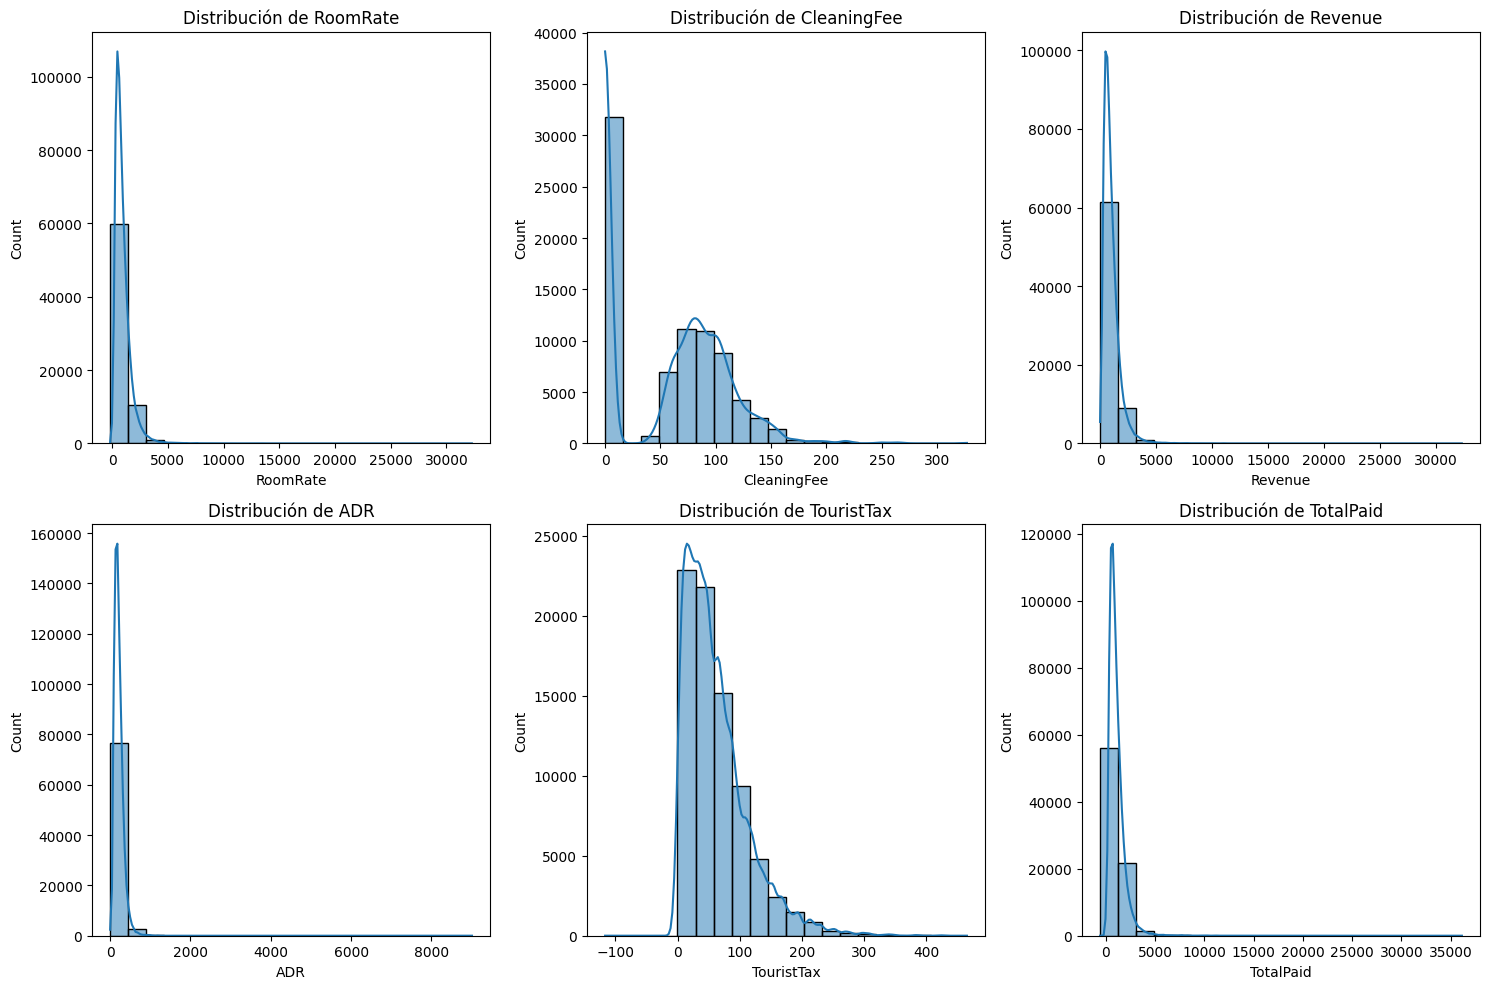

In [5]:
# Histogramas de columnas numéricas
numerical_columns = ['RoomRate', 'CleaningFee', 'Revenue', 'ADR', 'TouristTax', 'TotalPaid']

plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df_bookings[column], bins=20, kde=True)
    plt.title(f'Distribución de {column}')
plt.tight_layout()
plt.show()

### 6. Análisis de Fechas

In [6]:
# Función para convertir las fechas
def convert_dates(date):
    return pd.to_datetime(date, errors='coerce')

# Aplicar la conversión a la columna 'BookingCreatedDate'
df_bookings['BookingCreatedDate'] = df_bookings['BookingCreatedDate'].apply(convert_dates)

# Verificar los cambios
print(df_bookings['BookingCreatedDate'].head())

/var/folders/gl/5twg_c850jl21hlyjq2d9q2m0000gn/T/ipykernel_25790/3983068377.py:3: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  return pd.to_datetime(date, errors='coerce')


0   2024-10-03 16:42:13
1   2024-03-10 00:00:00
2   2024-03-10 00:00:00
3   2024-10-03 15:55:39
4   2024-10-03 15:53:02
Name: BookingCreatedDate, dtype: datetime64[ns]


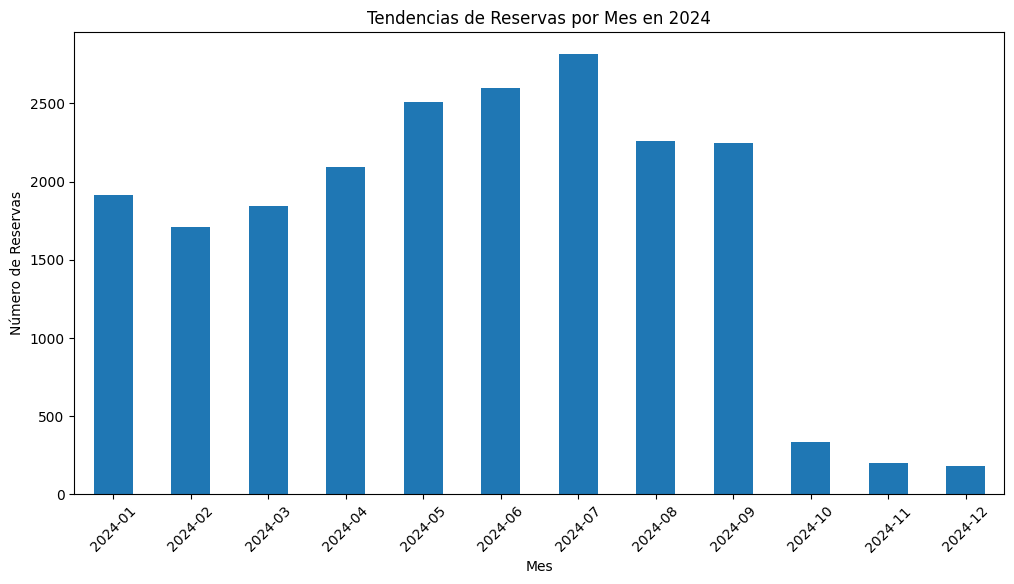

In [7]:
# Filtrar las filas donde 'BookingCreatedDate' está en 2024
df_bookings['BookingCreatedDate'] = pd.to_datetime(df_bookings['BookingCreatedDate'], errors='coerce')
df_bookings = df_bookings[df_bookings['BookingCreatedDate'].dt.year == 2024]

# Convertir las columnas de fecha a datetime
df_bookings['ArrivalDate'] = pd.to_datetime(df_bookings['ArrivalDate'], errors='coerce')
df_bookings['DepartureDate'] = pd.to_datetime(df_bookings['DepartureDate'], errors='coerce')

# Analizar las tendencias de las reservas a lo largo del tiempo
booking_trends = df_bookings['BookingCreatedDate'].dt.to_period('M').value_counts().sort_index()

plt.figure(figsize=(12, 6))
booking_trends.plot(kind='bar')
plt.title('Tendencias de Reservas por Mes en 2024')
plt.xlabel('Mes')
plt.ylabel('Número de Reservas')
plt.xticks(rotation=45)
plt.show()

### 7. Correlación entre Variables Numéricas

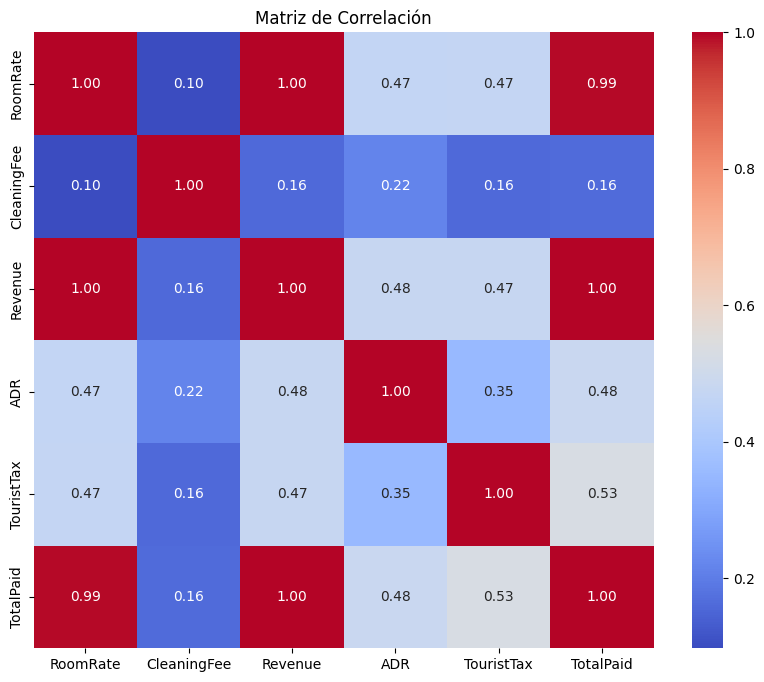

In [8]:
# Matriz de correlación
correlation_matrix = df_bookings[numerical_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()


### 8. Guardar archivo

In [9]:
import os

# Definir la ruta de la carpeta y crearla si no existe
output_dir = 'data_ddv'
os.makedirs(output_dir, exist_ok=True)

# Guardar el DataFrame como CSV en la carpeta especificada
output_path = os.path.join(output_dir, 'Bookings.csv')
df_bookings.to_csv(output_path, index=False)

print(f"Archivo guardado en: {output_path}")


Archivo guardado en: data_ddv/Bookings.csv
